In [12]:
%pylab inline
num_samples = 44100
input1 = linspace(-1, 1, num_samples)
input2 = linspace(1, -1, num_samples)

Populating the interactive namespace from numpy and matplotlib


In [13]:
cat 01_greater.stride

use DesktopAudio version 1.0

AudioIn >> Greater() >> AudioOut[0];


In [14]:
out_text = ''


for val1, val2 in zip(input1, input2):
    if val1 > val2:
        output = 1
    else:
        output = 0
    out_text += str(output) + "\n" +"0.0\n"

out_file = open("01_greater.expected", "w")
out_file.write(out_text[:-1])

pass

In [15]:
cat 02_oscillator.stride

use DesktopAudio version 1.0

import Generators

Oscillator() >> AudioOut[0];

In [16]:
out_text = ''

phase = 0.0
inc = 2.0 * np.pi* 440.0/44100.0

for val1, val2 in zip(input1, input2):
    output = sin(phase)
    phase += inc
    if phase > (2.0 * np.pi):
        phase -= (2.0 * np.pi)
    out_text += str(output) + "\n" +"0.0\n"

out_file = open("02_oscillator.expected", "w")
out_file.write(out_text[:-1])

pass

In [17]:
cat 03_oscillator_impulse.stride

use DesktopAudio version 1.0

import Generators

Oscillator() >> AudioOut[0];

Impulse(frequency: 1) >> AudioOut[1];


In [18]:
out_text = ''

phase = 0.0
inc = 2.0 * np.pi* 440.0/44100.0

phase2 = 1.0
inc2 = 1.0/44100.0

for val1, val2 in zip(input1, input2):
    output = sin(phase)
    phase += inc
    if phase > (2.0 * np.pi):
        phase -= (2.0 * np.pi)
        
    output2 = 0.0
    phase2 += inc2
    if phase2 >= 1.0:
        phase2 -= 1.0
        output2 = 1.0
    out_text += str(output) + "\n" + str(output2)+ "\n"

out_file = open("03_oscillator_impulse.expected", "w")
out_file.write(out_text[:-1])

pass

In [19]:
inc2

2.2675736961451248e-05

In [20]:
cat 04_sum.stride

use DesktopAudio version 1.0

AudioIn >> Sum() >> AudioOut[0];

[1.0, AudioIn[1], 0.5, AudioIn[0]] >> Sum() >> AudioOut[1];



In [21]:
out_text = ''

phase = 0.0

for val1, val2 in zip(input1, input2):
    total = 1.0 + val1 + 0.5 + val2
    out_text += str(val1 + val2) + "\n" + str(total)+ "\n"

out_file = open("04_sum.expected", "w")
out_file.write(out_text[:-1])

pass

In [22]:
cat 05_Select.stride

use DesktopAudio version 1.0

[AudioIn[0], 0.0] >> Greater() >> Select(whenOn: AudioIn[0] whenOff: AudioIn[1]) >> AudioOut[1];

In [26]:
out_text = ''

for val1, val2 in zip(input1, input2):
    if val1 > 0:
        out_text += "0.0\n" + str(val1) + "\n"
    else:
        out_text += "0.0\n" + str(val2) + "\n"

out_file = open("05_Select.expected", "w")
out_file.write(out_text[:-1])

pass

In [24]:
cat 06_Clip.stride

use DesktopAudio version 1.0

AudioIn[0] >> Clip(maximum: 0.5 minimum: -0.5) >> AudioOut[1];

In [25]:
out_text = ''

phase = 0.0

for val1, val2 in zip(input1, input2):
    if val1 > 0.5:
        out_text += "0.0\n0.5\n"
    elif val1 < -0.5:
        out_text += "0.0\n-0.5\n"
    else:
        out_text +=  "0.0\n" + str(val1) + "\n"

out_file = open("06_Clip.expected", "w")
out_file.write(out_text[:-1])

pass

In [ ]:
cat 07_Serial.stride

In [ ]:
cat 08_Wiring.stride

In [ ]:
cat 09_Wiring_IO.stride

In [ ]:
cat 10_Saturn.stride

In [3]:
cat 11_Envelope.stride

use DesktopAudio version 1.0

import Generators

Impulse(frequency: 1) >> AD(attack: 0.01 decay: 0.7) >> Envelope;

Oscillator(frequency: 880 amplitude: Envelope) >> AudioOut[0];

#Oscillator(frequency: 440) * Envelope >> AudioOut[0];


In [ ]:
out_text = ''

phase = 0.0

for val1, val2 in zip(input1, input2):
    if val1 > 0.5:
        out_text += "0.0\n0.5\n"
    elif val1 < -0.5:
        out_text += "0.0\n-0.5\n"
    else:
        out_text +=  "0.0\n" + str(val1) + "\n"

out_file = open("06_Clip.expected", "w")
out_file.write(out_text[:-1])

pass

In [ ]:
cat 12_Counter.stride

In [4]:
cat 16_sequencer.stride

use DesktopAudio version 1.0

import Notes as N
import Generators

signal Frequency {
    domain: AudioDomain
}

switch SeqTrigger { #FIXME breaks if trigger used instead of switch
    domain: AudioDomain
}

constant Values[4] {
    value: [ N::C4, N::E4, N::G4, N::C5 ]
}

[Impulse( frequency: 1.0 ), 1.0]
>> Equal()
>> SeqTrigger
>> Sequencer(values: Values)
>> Frequency;


Oscillator(frequency: Frequency) >> AudioOut[0];

#[Impulse( frequency: 0.5 ), 1.0]
#>> Equal()
#>> SeqTrigger
#>> Sequencer(values: [ N::C4, N::E4, N::G4, N::C5 ])
#>> Frequency;
#
#Oscillator(frequency: Frequency) >> AudioOut[0];


In [ ]:
out_text = ''

phase = 0.0
inc = 2.0 * np.pi* 440.0/44100.0

for val1, val2 in zip(input1, input2):
    output = sin(phase)
    phase += inc
    if phase > (2.0 * np.pi):
        phase -= (2.0 * np.pi)
        
    
    out_text += str(output) + "\n" +"0.0\n"

out_file = open("16_sequencer.expected", "w")
out_file.write(out_text[:-1])

pass

In [13]:


f = open('/home/andres/Documents/src/Stride/build-Stride-Desktop_Qt_5_9_2_GCC_64bit2-Debug/tests/failed.output')

In [15]:
f = open('/home/andres/Documents/src/Stride/build-Stride-Desktop_Qt_5_9_2_GCC_64bit2-Debug/tests/failed.output')
values = [float(line) for line in f.readlines()]

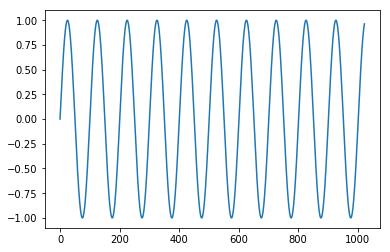

In [17]:
plot(values[::2][:1024])

In [19]:
f = open('/home/andres/Documents/src/Stride/Stride/strideroot/frameworks/RtAudio/1.0/_tests/platform/02_oscillator.expected')
expected = [float(line) for line in f.readlines()]

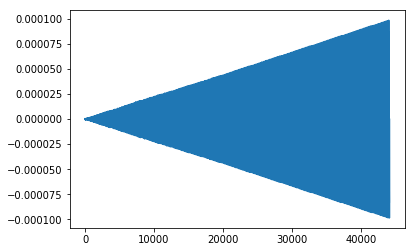

In [26]:
plot(np.array(expected)[:44100] - np.array(values))